In [60]:
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns

In [185]:
raxml_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/raxml_real_data.csv")
iqtree_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/iqtree_real_data.csv")



In [153]:
(iqtree_real_data["feature_msa_n_seq"].unique())

array([188.,  97., 237., 139.,  32., 152.,  70.,  38., 351., 146., 332.,
        61.,  44., 326.,  41.,  51., 145.,  69.,  79., 340., 327.,  92.,
       355.,  94.])

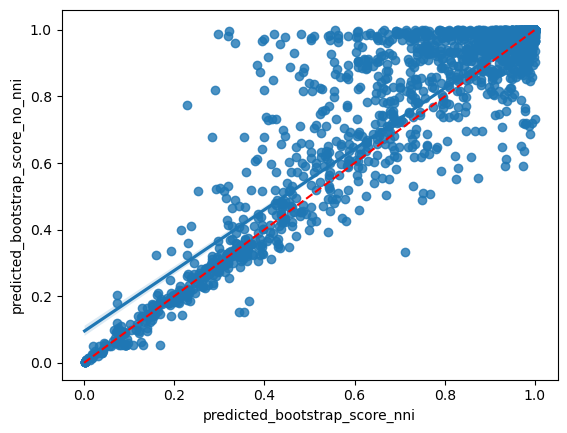

In [152]:
#bootstrap
sns.regplot(x='predicted_bootstrap_score_nni',y='predicted_bootstrap_score_no_nni', data = iqtree_real_data )
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')

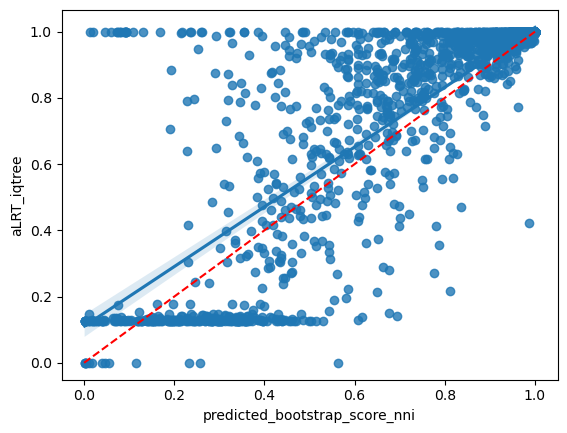

In [142]:
#aLRT
sns.regplot(x='predicted_bootstrap_score_nni',y='aLRT_iqtree', data = iqtree_real_data )
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')

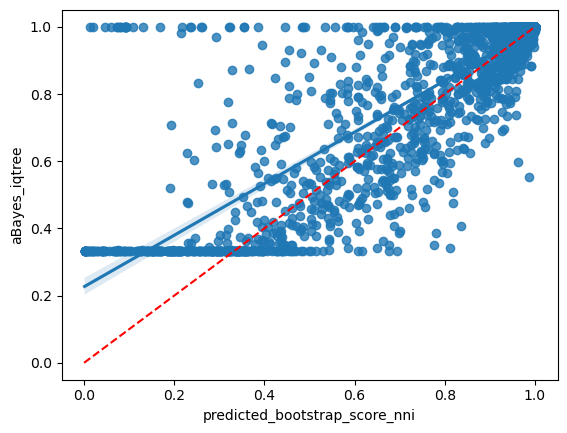

In [143]:
sns.regplot(y='aBayes_iqtree',x='predicted_bootstrap_score_nni', data = iqtree_real_data)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')


In [193]:
np.corrcoef(iqtree_real_data['aLRT_iqtree'],iqtree_real_data['predicted_bootstrap_score_nni'])

array([[1.        , 0.87088398],
       [0.87088398, 1.        ]])

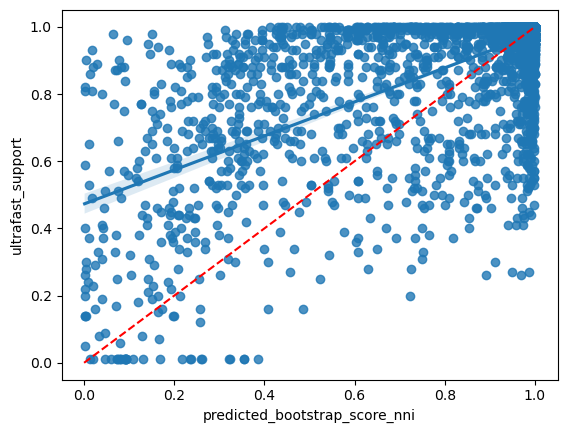

In [144]:
iqtree_real_data['ultrafast_support'] = iqtree_real_data['bootstrap_support']/100
sns.regplot(y='ultrafast_support',x='predicted_bootstrap_score_nni', data = iqtree_real_data)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')

In [145]:
print(np.mean(iqtree_real_data['aLRT_iqtree']))
print(np.mean(iqtree_real_data['aBayes_iqtree']))
print(np.mean(iqtree_real_data['ultrafast_support']))
print(np.mean(iqtree_real_data['predicted_bootstrap_score_nni']))
print(np.mean(iqtree_real_data['predicted_bootstrap_score_no_nni']))

0.8948243416006137
0.8929621580158528
0.9129506520071593
0.8695342390946891
0.8883264793314367


(array([ 816., 1005.,  823.,  616.,  136.,   29.,   89.,  136.,   76.,
         185.]),
 array([ 699., 1473., 2247., 3021., 3795., 4569., 5343., 6117., 6891.,
        7665., 8439.]),
 <BarContainer object of 10 artists>)

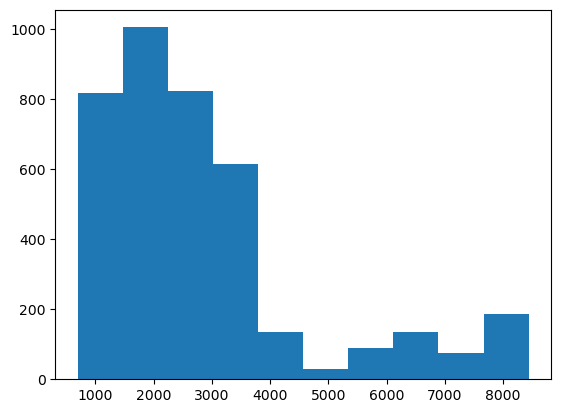

In [186]:
plt.hist(iqtree_real_data['feature_msa_n_loci'])

In [156]:
print(np.corrcoef(iqtree_real_data['aLRT_iqtree'],iqtree_real_data['predicted_bootstrap_score_nni']))
print(np.corrcoef(iqtree_real_data['aBayes_iqtree'],iqtree_real_data['predicted_bootstrap_score_nni']))

[[1.         0.87088398]
 [0.87088398 1.        ]]
[[1.         0.88303888]
 [0.88303888 1.        ]]


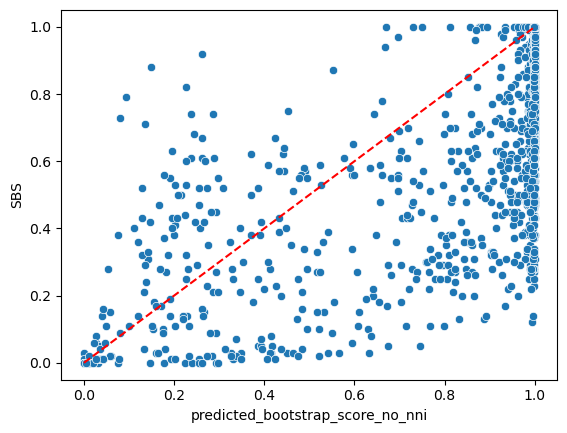

In [198]:
raxml_real_data_small = raxml_real_data.loc[raxml_real_data.feature_msa_n_loci<10000].loc[raxml_real_data.feature_msa_n_seq<200]
raxml_real_data_small['SBS'] = raxml_real_data_small['bootstrap_support']/100
sns.scatterplot(x='predicted_bootstrap_score_no_nni', y='SBS', data = raxml_real_data_small)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')

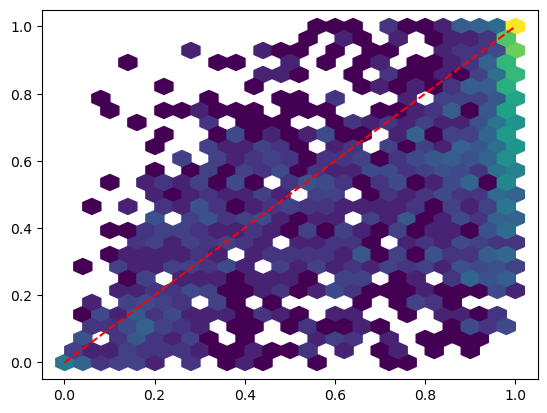

In [162]:
#raxml_real_data['TBE'] = raxml_real_data['tbe_raxml']/100

plt.hexbin(raxml_real_data['predicted_bootstrap_score_nni'], raxml_real_data['bootstrap_support']/100, gridsize=25, cmap='viridis', bins='log')

#plt.scatter(, alpha = 0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')


#sns.scatterplot(x='predicted_bootstrap_score_nni', y='tbe_raxml', data = raxml_real_data)
#plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')


array([[ 1.        , -0.06232107],
       [-0.06232107,  1.        ]])

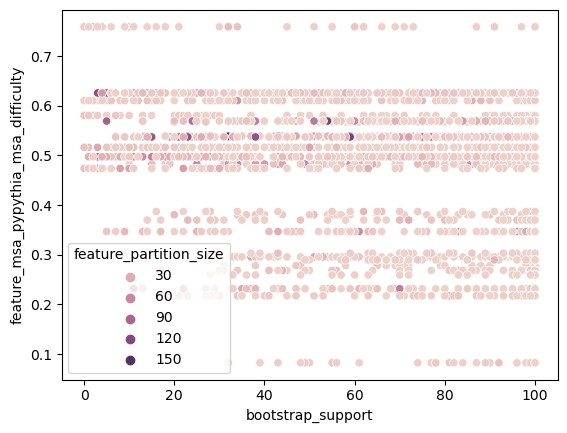

In [184]:
sns.scatterplot(x="bootstrap_support", y='feature_msa_pypythia_msa_difficulty', data = raxml_real_data, hue = "feature_partition_size") 
np.corrcoef(raxml_real_data["predicted_bootstrap_score_nni"], raxml_real_data['feature_partition_size']) 

array([[1.        , 0.09903401],
       [0.09903401, 1.        ]])

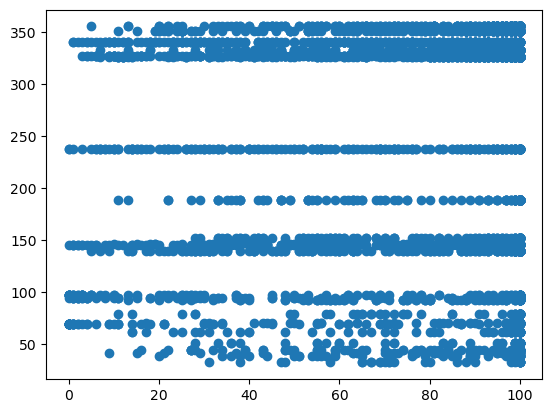

In [173]:
plt.scatter(raxml_real_data["bootstrap_support"], raxml_real_data['feature_msa_n_seq'])
np.corrcoef(raxml_real_data["bootstrap_support"], raxml_real_data['feature_msa_n_seq']) 
#np.corrcoef(raxml_real_data["bootstrap_support"], raxml_real_data['feature_partition_size']) 

In [191]:
print(np.mean(raxml_real_data['bootstrap_support']))
print(np.mean(raxml_real_data['tbe_raxml']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_nni']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_no_nni']))

74.90590641779596
0.8860602173357198
0.8557875939109184
0.862989449365441


In [179]:
np.unique(raxml_real_data['feature_msa_n_seq'])

array([ 32.,  38.,  41.,  44.,  51.,  61.,  69.,  70.,  79.,  92.,  94.,
        97., 139., 145., 146., 152., 188., 237., 326., 327., 332., 340.,
       351., 355.])